# Exploratory data analysis - Qredo L2 transactions

#### Maria Silva, May 2023

In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Import data

In [2]:
tx_file = os.path.realpath("../data/transaction_export.csv")

tx_df = pd.read_csv(tx_file)
tx_df["date"] = pd.to_datetime(tx_df["timestamp"], unit="s")
tx_df["year_month"] = tx_df["date"].dt.year.astype("str") + "-" + tx_df["date"].dt.month.astype("str")
tx_df = tx_df.sort_values("timestamp").reset_index(drop=True)
print(len(tx_df))

1130352


In [3]:
tx_df.iloc[0].T

tx_id               75uB1aubrrf9u33uaJJstP6XJmMvfA8RUPYixpu3h4w8
tx_type                                                  deposit
chain_tx_id    5A676FC0400819A4EF88D63D429B76ECD3A73539D8A117...
wallet_id           9WTr4Sycv3rP1QE3ekhHi7WBN1PQzHoP8wWsoXFnS7Fo
fund_id                              1guxjFdsfO91UwSpbKFFA5x8vDq
asset                                                BTC-TESTNET
asset_scale                                            100000000
amount                                                      3000
fees                                                           0
net_amount                                                  3000
benefit_of                                                   NaN
timestamp                                             1598979068
date                                         2020-09-01 16:51:08
year_month                                                2020-9
Name: 0, dtype: object

In [4]:
tx_df["date"].agg(["min", "max"])

min   2020-09-01 16:51:08
max   2023-05-01 22:36:21
Name: date, dtype: datetime64[ns]

## Data cleaning

There is some weird `transferIn` transactions with negative ammounts:

In [5]:
tx_df[tx_df["amount"]<0]

,tx_id,tx_type,chain_tx_id,wallet_id,fund_id,asset,asset_scale,amount,fees,net_amount,benefit_of,timestamp,date,year_month
310124,A2AAA97FE47568915077E94833816B55D1E67527612953...,transferIn,A2AAA97FE47568915077E94833816B55D1E67527612953...,7zVHWHBxUYVFFTzwjnsMKgY4qbXnsQPMxu2HNq1hEjvt,22t3a4gbaDhnPEZi6HO5SqQD2ri,DAI,1000000000,-6551738097771157760,0,-6551738097771157760,NaN,1651737335,2022-05-05 07:55:35,2022-5
761978,9A929E766726BABDEACC20F04435D9C0F3D3EDD9FA7D9B...,transferIn,9A929E766726BABDEACC20F04435D9C0F3D3EDD9FA7D9B...,KWBA9645MBMvZjhAsBYrhy95tonA4g3kt1SuhkHFLYG,1qHxmKKwrgEWgbqLWWBQudHxOxI,DOT,1000000,-167220194,0,-167220194,NaN,1667512599,2022-11-03 21:56:39,2022-11
761979,068E8C85A8978F02C7752EB36FD58840804E6AE4B8F0D1...,transferIn,068E8C85A8978F02C7752EB36FD58840804E6AE4B8F0D1...,a4DY8gVLS6f4odnykef5DueYtd1XhyEU7rc8guss5Ka,2F7Zd7q2DOPs2zlqqfj2Or2BzZa,DOT,1000000,-2000000,0,-2000000,NaN,1667512728,2022-11-03 21:58:48,2022-11
761980,1C221E417A82868948B08C07A8C73D66E5276A9A1BC06F...,transferIn,1C221E417A82868948B08C07A8C73D66E5276A9A1BC06F...,BUoucCCrXmnKSAGAZ9Hok8BoyMtwYiANPcrSmU3rzXMt,1sTAboyBno5LvDtqZhBK9hC6sDq,DOT,1000000,-5000000,0,-5000000,NaN,1667512833,2022-11-03 22:00:33,2022-11
774685,5F58FAA55762EA42DF100CD183417CC07483FD65776217...,transferIn,5F58FAA55762EA42DF100CD183417CC07483FD65776217...,HhVBXSJsEqfioewvTVyTB3CoEXfgxiB8eDaV1MdjHUgE,26pBElm0tqzUHpfOpCvAfMGejkC,ETH,1000000000,-10993273749,0,-10993273749,NaN,1667994708,2022-11-09 11:51:48,2022-11
984979,2F546A61725A393826FE7979ADF6944B977A85E930D133...,transferIn,2F546A61725A393826FE7979ADF6944B977A85E930D133...,GEScNnnoDHM2V9ffuVU2cB8hjuahEyvm1DReqZ7dZMA3,2Abz7Iv2LgRLMLQmhmJxvhSvlkB,USDC,1000000,-15014396729,0,-15014396729,NaN,1675182481,2023-01-31 16:28:01,2023-1
1064195,C1EE1E5717BD574A23FC87AA158894709296D2874A0600...,transferIn,C1EE1E5717BD574A23FC87AA158894709296D2874A0600...,FtU9795Jy22KT4feiLzKGxUndwqgJMcrjXWwrt1ZwE3y,1xZgmNpI1HJJri3RzOJDff7WXR8,ETH-GOERLI,1000000000,-25200000,0,-25200000,NaN,1679399965,2023-03-21 11:59:25,2023-3
1087079,4584B515DA42C19034B492F0AE157D395CE2A765DD7F08...,transferIn,4584B515DA42C19034B492F0AE157D395CE2A765DD7F08...,4Yha3VnxbcwhjbKLwbafrXb9vtYcLothTSKCL3AZPcio,1zXS4gV0jcT1hXGqWypoWFrbY9N,BSC-BUSD-TESTNET,1000000000,-999999982000301037,0,-999999982000301037,NaN,1680870570,2023-04-07 12:29:30,2023-4


In [6]:
clean_tx_df = tx_df[tx_df["amount"]>=0]

## Transaction types

In [7]:
clean_tx_df.groupby("tx_type").size()

tx_type
deposit         16424
swapIn            701
swapOut           709
transferIn     536304
transferOut    541531
withdraw        34675
dtype: int64

In [8]:
clean_tx_df.groupby("tx_type").size()/1130352

tx_type
deposit        0.014530
swapIn         0.000620
swapOut        0.000627
transferIn     0.474458
transferOut    0.479082
withdraw       0.030676
dtype: float64

In [9]:
clean_tx_df[["tx_type", "asset", "amount", "net_amount", "fees"]].groupby("tx_type").first()

,asset,amount,net_amount,fees
tx_type,,,,
deposit,BTC-TESTNET,3000,3000,0
swapIn,ETH,37000000,37000000,0
swapOut,ETH,37003700,37000000,3700
transferIn,BTC-TESTNET,2970,2970,0
transferOut,BTC-TESTNET,2973,2970,3
withdraw,BTC-TESTNET,2820,2000,820


In [10]:
temp_series = clean_tx_df.groupby(["tx_type", "asset"]).size().sort_values(ascending=False)/1130352
temp_series.reset_index().head(20)

,tx_type,asset,0
0,transferOut,QRDO,0.475745
1,transferIn,QRDO,0.471114
2,withdraw,QRDO,0.026294
3,deposit,QRDO,0.008738
4,deposit,ETH,0.001515
5,withdraw,USDT,0.001105
6,transferOut,USDC,0.001091
7,transferIn,USDC,0.001090
8,withdraw,BTC,0.001056
9,deposit,BTC,0.000933


## Transaction volume

In [11]:
vol_df = clean_tx_df.groupby("year_month")[["amount", "net_amount", "fees"]].sum()
vol_df["txs_count"] = clean_tx_df.groupby("year_month").size()
vol_df["date"] = clean_tx_df.groupby("year_month")["date"].first()
vol_df = vol_df.reset_index()
vol_df.head()

,year_month,amount,net_amount,fees,txs_count,date
0,2020-10,29410149,29398103,12046,87,2020-10-01 07:56:55
1,2020-11,44024060898,43811064979,212995919,333,2020-11-04 07:31:47
2,2020-12,28396070967,28348694807,47376160,272,2020-12-01 08:07:24
3,2020-9,414910357,413690423,1219934,133,2020-09-01 16:51:08
4,2021-1,13315983496,13311678329,4305167,66,2021-01-01 16:19:19


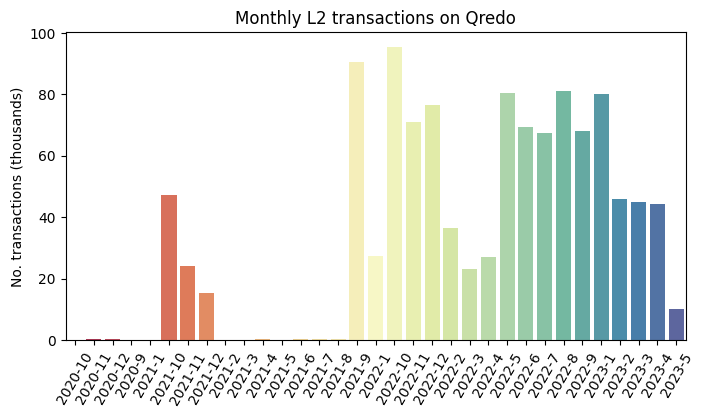

In [12]:
temp_df = vol_df.copy(deep=True)
temp_df["txs_count"] = temp_df["txs_count"]/1000

plt.figure(figsize=(8,4))
sns.barplot(data=temp_df, x="year_month", y="txs_count", palette="Spectral")
plt.ylabel("No. transactions (thousands)")
plt.xlabel("")
plt.xticks(rotation=60)
plt.title("Monthly L2 transactions on Qredo")
plt.show()

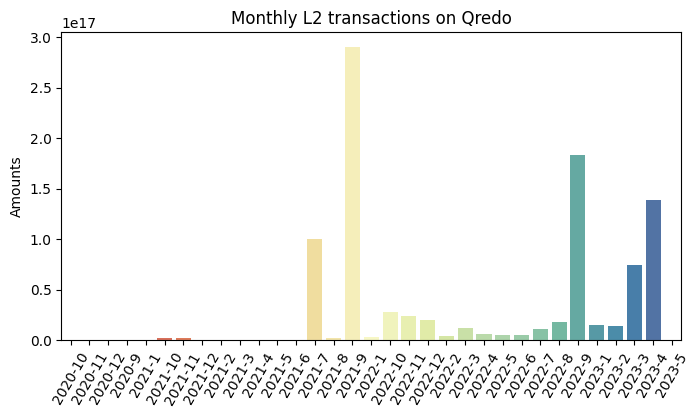

In [13]:
#temp_df = vol_df.copy(deep=True)
#temp_df["txs_count"] = temp_df["txs_count"]/1000

plt.figure(figsize=(8,4))
sns.barplot(data=vol_df, x="year_month", y="amount", palette="Spectral")
plt.ylabel("Amounts")
plt.xlabel("")
plt.xticks(rotation=60)
plt.title("Monthly L2 transactions on Qredo")
plt.show()

**I am not sure this amount plots is correct -> need to check what is the unit of the amount column!!!**

## Fees

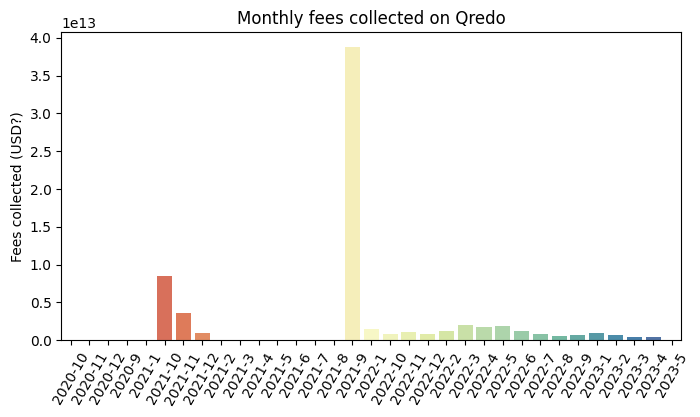

In [14]:
plt.figure(figsize=(8,4))
sns.barplot(data=temp_df, x="year_month", y="fees", palette="Spectral")
plt.ylabel("Fees collected (USD?)")
plt.xlabel("")
plt.xticks(rotation=60)
plt.title("Monthly fees collected on Qredo")
plt.show()

**I am not sure this amount plots is correct -> need to check what is the unit of the amount column!!!**